## Imports

In [1]:
from __future__ import division
import sys
import os
import glob
import random

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Sample Info

For this study, we processed two sets of samples; one set of plasma samples from the Taizhou Longitudinal Study, and a second set of commercially purchsed normal and cancer tissue samples from BioChain.

### Taizhou Longitudinal Study

In [3]:
pre_diagnosis_samples = ['TSH-PL180123001', 'TSH-PL180123006', 'TSH-PL180123007', 'TSH-PL180123008', 'TSH-PL180123010', 'TSH-PL180123013', 'TSH-PL180123014', 'TSH-PL180123016', 'TSH-PL180123017', 'TSH-PL180123018', 'TSH-PL180123021', 'TSH-PL180123022', 'TSH-PL180123025', 'TSH-PL180123027', 'TSH-PL180123029', 'TSH-PL180123030', 'TSH-PL180123031', 'TSH-PL180123033', 'TSH-PL180513004', 'TSH-PL180513005', 'TSH-PL180513006', 'TSH-PL180513007', 'TSH-PL180513011', 'TSH-PL180513012', 'TSH-PL180513013', 'TSH-PL180513014', 'TSH-PL180513016', 'TSH-PL180513017', 'TSH-PL180513020', 'TSH-PL180513021', 'TSH-PL180513023', 'TSH-PL180513024', 'TSH-PL180513025', 'TSH-PL180513026', 'TSH-PL180513027', 'TSH-PL180513029', 'TSH-PL180513030', 'TSH-PL180513034', 'TSH-PL180513036', 'TSH-PL180513037', 'TSH-PL180513038', 'TSH-PL180513039', 'TSH-PL180513040', 'TSH-PL180513041', 'TSH-PL180513043', 'TSH-PL180513045', 'TSH-PL180513049', 'TSH-PL180513050', 'TSH-PL180513051', 'TSH-PL180513055', 'TSH-PL180513056', 'TSH-PL180513057', 'TSH-PL180513060', 'TSH-PL180513062', 'TSH-PL180513066', 'TSH-PL180513067', 'TSH-PL180513068', 'TSH-PL180513069', 'TSH-PL180513070', 'TSH-PL180513071', 'TSH-PL180513072', 'TSH-PL180513073', 'TSH-PL180513075', 'TSH-PL180513076', 'TSH-PL180513077', 'TSH-PL180513078', 'TSH-PL180513079', 'TSH-PL180513080', 'TSH-PL180513081', 'TSH-PL180513084', 'TSH-PL180513085', 'TSH-PL180513087', 'TSH-PL180513088', 'TSH-PL180513089', 'TSH-PL180513091', 'TSH-PL180513092', 'TSH-PL180513093', 'TSH-PL180513095', 'TSH-PL180513097', 'TSH-PL180513098', 'TSH-PL180513099', 'TSH-PL180513100', 'TSH-PL180513101', 'TSH-PL180513102', 'TSH-PL180513104', 'TSH-PL180513106', 'TSH-PL180513108', 'TSH-PL180513109', 'TSH-PL180513110', 'TSH-PL180513111', 'TSH-PL180513114', 'TSH-PL180513115', 'TSH-PL180513117', 'TSH-PL180513118', 'TSH-PL180513119', 'TSH-PL180513121', 'TSH-PL180513122', 'TSH-PL180513123', 'TSH-PL180513124', 'TSH-PL180513127', 'TSH-PL180513128', 'TSH-PL180513129', 'TSH-PL180516001', 'TSH-PL180516002', 'TSH-PL180516003', 'TSH-PL180516004', 'TSH-PL180516006', 'TSH-PL180516007', 'TSH-PL180516008', 'TSH-PL180516009', 'TSH-PL180516011', 'TSH-PL180516012', 'TSH-PL180516013', 'TSH-PL180516014', 'TSH-PL180516016', 'TSH-PL180516018', 'TSH-PL180516019', 'TSH-PL180516020', 'TSH-PL180516021', 'TSH-PL180516023', 'TSH-PL180516027', 'TSH-PL180516028', 'TSH-PL180516030', 'TSH-PL180516031', 'TSH-PL180516032', 'TSH-PL180516036', 'TSH-PL180516038', 'TSH-PL180516039', 'TSH-PL180516040', 'TSH-PL180516042', 'TSH-PL180516043', 'TSH-PL180516044', 'TSH-PL180516045', 'TSH-PL180516049', 'TSH-PL180516051', 'TSH-PL180516053', 'TSH-PL180516054', 'TSH-PL180516055', 'TSH-PL180516056', 'TSH-PL180516057', 'TSH-PL180516059', 'TSH-PL180516062', 'TSH-PL180516063', 'TSH-PL180123002', 'TSH-PL180123004', 'TSH-PL180123005', 'TSH-PL180123012', 'TSH-PL180123024', 'TSH-PL180123032', 'TSH-PL180513001', 'TSH-PL180513002', 'TSH-PL180513003', 'TSH-PL180513009', 'TSH-PL180513010', 'TSH-PL180513018', 'TSH-PL180513019', 'TSH-PL180513022', 'TSH-PL180513028', 'TSH-PL180513031', 'TSH-PL180513032', 'TSH-PL180513033', 'TSH-PL180513035', 'TSH-PL180513044', 'TSH-PL180513058', 'TSH-PL180513064', 'TSH-PL180513083', 'TSH-PL180513086', 'TSH-PL180513090', 'TSH-PL180513096', 'TSH-PL180513103', 'TSH-PL180513105', 'TSH-PL180513112', 'TSH-PL180513116', 'TSH-PL180513125', 'TSH-PL180516005', 'TSH-PL180516010', 'TSH-PL180516015', 'TSH-PL180516017', 'TSH-PL180516025', 'TSH-PL180516026', 'TSH-PL180516029', 'TSH-PL180516033', 'TSH-PL180516034', 'TSH-PL180516046', 'TSH-PL180516047', 'TSH-PL180516048', 'TSH-PL180516050', 'TSH-PL180516052', 'TSH-PL180516058', 'TSH-PL180516060', 'TSH-PL180516061']
post_diagnosis_samples = ['TSH-PL171221101', 'TSH-PL171221112', 'TSH-PL171221149', 'TSH-PL171221150', 'TSH-PL171221160', 'TSH-PL171221172', 'TSH-PL171221179', 'TSH-PL171221180', 'TSH-PL180504001', 'TSH-PL180504002', 'TSH-PL180504003', 'TSH-PL180504004', 'TSH-PL180504005', 'TSH-PL180504009', 'TSH-PL180504010', 'TSH-PL180504011', 'TSH-PL180504013', 'TSH-PL180504014', 'TSH-PL180504015', 'TSH-PL180504016', 'TSH-PL180504017', 'TSH-PL180504018', 'TSH-PL180504019', 'TSH-PL180504021', 'TSH-PL180504022', 'TSH-PL180504027', 'TSH-PL180504028', 'TSH-PL180504030', 'TSH-PL180504033', 'TSH-PL180504034', 'TSH-PL180504041', 'TSH-PL180504042', 'TSH-PL180504044', 'TSH-PL180504046', 'TSH-PL180504047', 'TSH-PL180504049', 'TSH-PL180504050', 'TSH-PL180504053', 'TSH-PL180504054', 'TSH-PL180504058', 'TSH-PL180504061', 'TSH-PL180504062', 'TSH-PL180504063', 'TSH-PL180504065', 'TSH-PL180504068', 'TSH-PL180504070', 'TSH-PL180504074', 'TSH-PL180504081', 'TSH-PL180504083', 'TSH-PL180504087', 'TSH-PL180504088', 'TSH-PL180504089', 'TSH-PL180504091', 'TSH-PL180504094', 'TSH-PL180504097', 'TSH-PL180504101', 'TSH-PL180504104', 'TSH-PL180504108', 'TSH-PL180504111', 'TSH-PL180504118', 'TSH-PL180508001', 'TSH-PL180508004', 'TSH-PL180508005', 'TSH-PL180508006', 'TSH-PL180508008', 'TSH-PL180508009', 'TSH-PL180508011', 'TSH-PL180508012', 'TSH-PL180508013', 'TSH-PL180508014', 'TSH-PL180508015', 'TSH-PL180508019', 'TSH-PL180508020', 'TSH-PL180508021', 'TSH-PL180508022', 'TSH-PL180508025', 'TSH-PL180508030', 'TSH-PL180508031', 'TSH-PL180508033', 'TSH-PL180508034', 'TSH-PL180508036', 'TSH-PL180508037', 'TSH-PL180508038', 'TSH-PL180508039', 'TSH-PL180508040', 'TSH-PL180508041', 'TSH-PL180508042', 'TSH-PL180508043', 'TSH-PL180508049', 'TSH-PL180508050', 'TSH-PL180508060', 'TSH-PL180508061', 'TSH-PL180508064', 'TSH-PL180508068', 'TSH-PL180508076', 'TSH-PL180508078', 'TSH-PL180508083', 'TSH-PL180508086', 'TSH-PL180508089', 'TSH-PL180510005', 'TSH-PL180510006', 'TSH-PL180510007', 'TSH-PL180510008', 'TSH-PL180510010', 'TSH-PL180510011', 'TSH-PL180510012', 'TSH-PL180510014', 'TSH-PL180510015', 'TSH-PL180510016', 'TSH-PL180510017', 'TSH-PL180510018', 'TSH-PL180510019', 'TSH-PL180510021', 'TSH-PL180510023', 'TSH-PL180510024', 'TSH-PL180510025', 'TSH-PL180510026', 'TSH-PL180510030', 'TSH-PL180510031', 'TSH-PL180510033', 'TSH-PL180510038', 'TSH-PL180510040', 'TSH-PL180510044', 'TSH-PL180510047', 'TSH-PL180510050', 'TSH-PL180510052', 'TSH-PL180510053', 'TSH-PL180510054', 'TSH-PL180510055', 'TSH-PL180510057', 'TSH-PL180510061', 'TSH-PL180510063', 'TSH-PL180510066', 'TSH-PL180510071', 'TSH-PL180510072', 'TSH-PL180510073', 'TSH-PL180510074', 'TSH-PL180510075', 'TSH-PL180510076', 'TSH-PL180510077', 'TSH-PL180510078', 'TSH-PL180510079', 'TSH-PL180510080', 'TSH-PL180510085', 'TSH-PL180510089', 'TSH-PL180510092', 'TSH-PL180510095', 'TSH-PL180510101', 'TSH-PL180510104', 'TSH-PL180510105', 'TSH-PL180510107', 'TSH-PL180510112', 'TSH-PL180510121', 'TSH-PL180510122', 'TSH-PL180510125', 'TSH-PL180510139', 'TSH-PL180510140', 'TSH-PL180510146', 'TSH-PL180510147', 'TSH-PL180510162', 'TSH-PL181205168', 'TSH-PL181205170', 'TSH-PL181205173', 'TSH-PL181205175', 'TSH-PL181205182', 'TSH-PL171221151', 'TSH-PL180504006', 'TSH-PL180504012', 'TSH-PL180504024', 'TSH-PL180504026', 'TSH-PL180504029', 'TSH-PL180504037', 'TSH-PL180504043', 'TSH-PL180504045', 'TSH-PL180504051', 'TSH-PL180504052', 'TSH-PL180504055', 'TSH-PL180504057', 'TSH-PL180504064', 'TSH-PL180504076', 'TSH-PL180504084', 'TSH-PL180504110', 'TSH-PL180508003', 'TSH-PL180508007', 'TSH-PL180508023', 'TSH-PL180508026', 'TSH-PL180508028', 'TSH-PL180508029', 'TSH-PL180508032', 'TSH-PL180508044', 'TSH-PL180508052', 'TSH-PL180508065', 'TSH-PL180508067', 'TSH-PL180508088', 'TSH-PL180510002', 'TSH-PL180510004', 'TSH-PL180510013', 'TSH-PL180510020', 'TSH-PL180510022', 'TSH-PL180510032', 'TSH-PL180510034', 'TSH-PL180510035', 'TSH-PL180510043', 'TSH-PL180510048', 'TSH-PL180510068', 'TSH-PL180510088', 'TSH-PL180510090', 'TSH-PL180510098', 'TSH-PL180510100', 'TSH-PL180510103', 'TSH-PL180510108', 'TSH-PL180510109', 'TSH-PL180510113', 'TSH-PL180510117', 'TSH-PL180510124', 'TSH-PL180510143', 'TSH-PL181205169', 'TSH-PL181205172', 'TSH-PL181205174', 'TSH-PL181205177', 'TSH-PL181205179', 'TSH-PL171221153', 'TSH-PL171221113']
healthy_samples = ['TSH-PL180309087', 'TSH-PL180316003', 'TSH-PL180316005', 'TSH-PL180316016', 'TSH-PL180316017', 'TSH-PL180316018', 'TSH-PL180316022', 'TSH-PL180316024', 'TSH-PL180316027', 'TSH-PL180316033', 'TSH-PL180316037', 'TSH-PL180316038', 'TSH-PL180316039', 'TSH-PL180316049', 'TSH-PL180316061', 'TSH-PL180316065', 'TSH-PL180316079', 'TSH-PL180316092', 'TSH-PL180316095', 'TSH-PL180316099', 'TSH-PL180316101', 'TSH-PL180316106', 'TSH-PL180316115', 'TSH-PL180316119', 'TSH-PL180316126', 'TSH-PL180316129', 'TSH-PL180316157', 'TSH-PL180316161', 'TSH-PL180316163', 'TSH-PL180316164', 'TSH-PL180316173', 'TSH-PL180316174', 'TSH-PL180316181', 'TSH-PL180316183', 'TSH-PL180316187', 'TSH-PL180316190', 'TSH-PL180316195', 'TSH-PL180316196', 'TSH-PL180316198', 'TSH-PL180323034', 'TSH-PL180323038', 'TSH-PL180323051', 'TSH-PL180323052', 'TSH-PL180323054', 'TSH-PL180323059', 'TSH-PL180323065', 'TSH-PL180323067', 'TSH-PL180323072', 'TSH-PL180323073', 'TSH-PL180323091', 'TSH-PL180323106', 'TSH-PL180323107', 'TSH-PL180323109', 'TSH-PL180323110', 'TSH-PL180323111', 'TSH-PL180323119', 'TSH-PL180323121', 'TSH-PL180323124', 'TSH-PL180323139', 'TSH-PL180323141', 'TSH-PL180323142', 'TSH-PL180323151', 'TSH-PL180323155', 'TSH-PL180323166', 'TSH-PL180410003', 'TSH-PL180410023', 'TSH-PL180410043', 'TSH-PL180410049', 'TSH-PL180410059', 'TSH-PL180410063', 'TSH-PL180410076', 'TSH-PL180410087', 'TSH-PL180410115', 'TSH-PL180410116', 'TSH-PL180410133', 'TSH-PL180410140', 'TSH-PL180410144', 'TSH-PL180410160', 'TSH-PL180410162', 'TSH-PL180410198', 'TSH-PL180417003', 'TSH-PL180417007', 'TSH-PL180417035', 'TSH-PL180417060', 'TSH-PL180417074', 'TSH-PL180417087', 'TSH-PL180417095', 'TSH-PL180417101', 'TSH-PL180417109', 'TSH-PL180417117', 'TSH-PL180417135', 'TSH-PL180417138', 'TSH-PL180417143', 'TSH-PL180417152', 'TSH-PL180417156', 'TSH-PL180417165', 'TSH-PL180417170', 'TSH-PL180417179', 'TSH-PL180417180', 'TSH-PL180417181', 'TSH-PL180417200', 'TSH-PL180424003', 'TSH-PL180424030', 'TSH-PL180424036', 'TSH-PL180424058', 'TSH-PL180424090', 'TSH-PL180424097', 'TSH-PL180424104', 'TSH-PL180424115', 'TSH-PL180424146', 'TSH-PL180424149', 'TSH-PL180424155', 'TSH-PL180424162', 'TSH-PL180424166', 'TSH-PL180424171', 'TSH-PL180703037', 'TSH-PL180703136', 'TSH-PL180703153', 'TSH-PL180703157', 'TSH-PL180703185', 'TSH-PL180706034', 'TSH-PL180706037', 'TSH-PL180706095', 'TSH-PL180706096', 'TSH-PL180706104', 'TSH-PL180706113', 'TSH-PL180706118', 'TSH-PL180706145', 'TSH-PL180706147', 'TSH-PL180706150', 'TSH-PL180706153', 'TSH-PL180706156', 'TSH-PL181128001', 'TSH-PL181128003', 'TSH-PL181128005', 'TSH-PL181128007', 'TSH-PL181128008', 'TSH-PL181128009', 'TSH-PL181128011', 'TSH-PL181128012', 'TSH-PL181128014', 'TSH-PL181128015', 'TSH-PL181128019', 'TSH-PL181128021', 'TSH-PL181128022', 'TSH-PL181128023', 'TSH-PL181128025', 'TSH-PL181128027', 'TSH-PL181128029', 'TSH-PL181128030', 'TSH-PL181128033', 'TSH-PL181128035', 'TSH-PL181128036', 'TSH-PL181128038', 'TSH-PL181128039', 'TSH-PL181128040', 'TSH-PL181128041', 'TSH-PL181128042', 'TSH-PL181128043', 'TSH-PL181128045', 'TSH-PL181128047', 'TSH-PL181128048', 'TSH-PL181128049', 'TSH-PL181128050', 'TSH-PL181128051', 'TSH-PL181128054', 'TSH-PL181128055', 'TSH-PL181128056', 'TSH-PL181128057', 'TSH-PL181128058', 'TSH-PL181128061', 'TSH-PL181128062', 'TSH-PL181128064', 'TSH-PL181128065', 'TSH-PL181128066', 'TSH-PL181128070', 'TSH-PL181128073', 'TSH-PL181128077', 'TSH-PL181128080', 'TSH-PL181128082', 'TSH-PL181128083', 'TSH-PL181128085', 'TSH-PL181128086', 'TSH-PL181128093', 'TSH-PL181128096', 'TSH-PL181128099', 'TSH-PL181128101', 'TSH-PL181128102', 'TSH-PL181128103', 'TSH-PL181128104', 'TSH-PL181128107', 'TSH-PL181128109', 'TSH-PL181128110', 'TSH-PL181128111', 'TSH-PL181128112', 'TSH-PL181128114', 'TSH-PL181128115', 'TSH-PL181128117', 'TSH-PL181128118', 'TSH-PL181128120', 'TSH-PL181128122', 'TSH-PL181128123', 'TSH-PL181128124', 'TSH-PL181128125', 'TSH-PL181128126', 'TSH-PL181128127', 'TSH-PL181205002', 'TSH-PL181205003', 'TSH-PL181205005', 'TSH-PL181205006', 'TSH-PL181205008', 'TSH-PL181205009', 'TSH-PL181205013', 'TSH-PL181205014', 'TSH-PL181205016', 'TSH-PL181205020', 'TSH-PL181205022', 'TSH-PL181205024', 'TSH-PL181205026', 'TSH-PL181205027', 'TSH-PL181205028', 'TSH-PL181205030', 'TSH-PL181205033', 'TSH-PL181205035', 'TSH-PL181205040', 'TSH-PL181205041', 'TSH-PL181205042', 'TSH-PL181205043', 'TSH-PL181205044', 'TSH-PL181205045', 'TSH-PL181205046', 'TSH-PL181205047', 'TSH-PL181205048', 'TSH-PL181205049', 'TSH-PL181205051', 'TSH-PL181205053', 'TSH-PL181205054', 'TSH-PL181205055', 'TSH-PL181205057', 'TSH-PL181205058', 'TSH-PL181205059', 'TSH-PL181205060', 'TSH-PL181205061', 'TSH-PL181205062', 'TSH-PL181205063', 'TSH-PL181205064', 'TSH-PL181205065', 'TSH-PL181205066', 'TSH-PL181205068', 'TSH-PL181205069', 'TSH-PL181205072', 'TSH-PL181205074', 'TSH-PL181205075', 'TSH-PL181205076', 'TSH-PL181205077', 'TSH-PL181205078', 'TSH-PL181205079', 'TSH-PL181205081', 'TSH-PL181205082', 'TSH-PL181205083', 'TSH-PL181205085', 'TSH-PL181205086', 'TSH-PL181205087', 'TSH-PL181205088', 'TSH-PL181205090', 'TSH-PL181205091', 'TSH-PL181205093', 'TSH-PL181205095', 'TSH-PL181205096', 'TSH-PL181205097', 'TSH-PL181205098', 'TSH-PL181205099', 'TSH-PL181205102', 'TSH-PL181205103', 'TSH-PL181205104', 'TSH-PL181205107', 'TSH-PL181205108', 'TSH-PL181205110', 'TSH-PL181205113', 'TSH-PL181205115', 'TSH-PL181205116', 'TSH-PL181205117', 'TSH-PL181205121', 'TSH-PL181205122', 'TSH-PL181205125', 'TSH-PL181205128', 'TSH-PL181205129', 'TSH-PL181205140', 'TSH-PL181205141', 'TSH-PL181205142', 'TSH-PL181205143', 'TSH-PL181205144', 'TSH-PL181205145', 'TSH-PL181205146', 'TSH-PL181205147', 'TSH-PL181205148', 'TSH-PL181205149', 'TSH-PL181205150', 'TSH-PL181205151', 'TSH-PL181205152', 'TSH-PL181205155', 'TSH-PL181205156', 'TSH-PL181205157', 'TSH-PL181205158', 'TSH-PL181205160', 'TSH-PL181205161', 'TSH-PL181205162', 'TSH-PL181205164', 'TSH-PL181205165', 'TSH-PL181205166', 'TSH-PL180309082', 'TSH-PL180316013', 'TSH-PL180316029', 'TSH-PL180316075', 'TSH-PL180316102', 'TSH-PL180316112', 'TSH-PL180316134', 'TSH-PL180316138', 'TSH-PL180316175', 'TSH-PL180316178', 'TSH-PL180316200', 'TSH-PL180323029', 'TSH-PL180323032', 'TSH-PL180323053', 'TSH-PL180323068', 'TSH-PL180323074', 'TSH-PL180323088', 'TSH-PL180323097', 'TSH-PL180323103', 'TSH-PL180323115', 'TSH-PL180323120', 'TSH-PL180323160', 'TSH-PL180323175', 'TSH-PL180410058', 'TSH-PL180410070', 'TSH-PL180410081', 'TSH-PL180410148', 'TSH-PL180410161', 'TSH-PL180417017', 'TSH-PL180417023', 'TSH-PL180417045', 'TSH-PL180417077', 'TSH-PL180417104', 'TSH-PL180417111', 'TSH-PL180417124', 'TSH-PL180417162', 'TSH-PL180417169', 'TSH-PL180417199', 'TSH-PL180424042', 'TSH-PL180424088', 'TSH-PL180424138', 'TSH-PL180703012', 'TSH-PL180703127', 'TSH-PL180703134', 'TSH-PL180703141', 'TSH-PL180703168', 'TSH-PL180706117', 'TSH-PL181128004', 'TSH-PL181128006', 'TSH-PL181128013', 'TSH-PL181128018', 'TSH-PL181128020', 'TSH-PL181128031', 'TSH-PL181128037', 'TSH-PL181128067', 'TSH-PL181128071', 'TSH-PL181128078', 'TSH-PL181128084', 'TSH-PL181128095', 'TSH-PL181128097', 'TSH-PL181128098', 'TSH-PL181128105', 'TSH-PL181128106', 'TSH-PL181128108', 'TSH-PL181128113', 'TSH-PL181128116', 'TSH-PL181205001', 'TSH-PL181205004', 'TSH-PL181205007', 'TSH-PL181205010', 'TSH-PL181205011', 'TSH-PL181205012', 'TSH-PL181205015', 'TSH-PL181205018', 'TSH-PL181205019', 'TSH-PL181205023', 'TSH-PL181205031', 'TSH-PL181205032', 'TSH-PL181205036', 'TSH-PL181205037', 'TSH-PL181205052', 'TSH-PL181205056', 'TSH-PL181205067', 'TSH-PL181205070', 'TSH-PL181205071', 'TSH-PL181205073', 'TSH-PL181205080', 'TSH-PL181205084', 'TSH-PL181205089', 'TSH-PL181205092', 'TSH-PL181205094', 'TSH-PL181205100', 'TSH-PL181205101', 'TSH-PL181205106', 'TSH-PL181205112', 'TSH-PL181205118', 'TSH-PL181205119', 'TSH-PL181205120', 'TSH-PL181205123', 'TSH-PL181205124', 'TSH-PL181205153', 'TSH-PL181205154', 'TSH-PL181205159', 'TSH-PL181205163']

In [4]:
post_diagnosis_samples_colon = ['TSH-PL180510139', 'TSH-PL180510140', 'TSH-PL180510146', 'TSH-PL180510147', 'TSH-PL180510162', 'TSH-PL181205175', 'TSH-PL180510143']
post_diagnosis_samples_liver = ['TSH-PL180510085', 'TSH-PL180510089', 'TSH-PL180510092', 'TSH-PL180510095', 'TSH-PL180510101', 'TSH-PL180510104', 'TSH-PL180510105', 'TSH-PL180510107', 'TSH-PL180510112', 'TSH-PL180510121', 'TSH-PL180510122', 'TSH-PL180510125', 'TSH-PL181205173', 'TSH-PL180510088', 'TSH-PL180510090', 'TSH-PL180510098', 'TSH-PL180510100', 'TSH-PL180510103', 'TSH-PL180510108', 'TSH-PL180510109', 'TSH-PL180510113', 'TSH-PL180510117', 'TSH-PL180510124']
post_diagnosis_samples_esophagus = ['TSH-PL171221101', 'TSH-PL171221112', 'TSH-PL171221149', 'TSH-PL171221150', 'TSH-PL171221160', 'TSH-PL171221172', 'TSH-PL171221179', 'TSH-PL171221180', 'TSH-PL180508001', 'TSH-PL180508004', 'TSH-PL180508005', 'TSH-PL180508006', 'TSH-PL180508008', 'TSH-PL180508009', 'TSH-PL180508011', 'TSH-PL180508012', 'TSH-PL180508013', 'TSH-PL180508014', 'TSH-PL180508015', 'TSH-PL180508019', 'TSH-PL180508020', 'TSH-PL180508021', 'TSH-PL180508022', 'TSH-PL180508025', 'TSH-PL180508030', 'TSH-PL180508031', 'TSH-PL180508033', 'TSH-PL180508034', 'TSH-PL180508036', 'TSH-PL180508037', 'TSH-PL180508038', 'TSH-PL180508039', 'TSH-PL180508040', 'TSH-PL180508041', 'TSH-PL180508042', 'TSH-PL180508043', 'TSH-PL180508049', 'TSH-PL180508050', 'TSH-PL180508060', 'TSH-PL180508061', 'TSH-PL180508064', 'TSH-PL180508068', 'TSH-PL180508076', 'TSH-PL180508078', 'TSH-PL180508083', 'TSH-PL180508086', 'TSH-PL180508089', 'TSH-PL180510044', 'TSH-PL180510061', 'TSH-PL181205168', 'TSH-PL181205170', 'TSH-PL171221151', 'TSH-PL180508003', 'TSH-PL180508007', 'TSH-PL180508023', 'TSH-PL180508026', 'TSH-PL180508028', 'TSH-PL180508029', 'TSH-PL180508032', 'TSH-PL180508044', 'TSH-PL180508052', 'TSH-PL180508065', 'TSH-PL180508067', 'TSH-PL180508088', 'TSH-PL181205172', 'TSH-PL181205174', 'TSH-PL171221153', 'TSH-PL171221113']
post_diagnosis_samples_lung = ['TSH-PL180510005', 'TSH-PL180510006', 'TSH-PL180510007', 'TSH-PL180510008', 'TSH-PL180510010', 'TSH-PL180510011', 'TSH-PL180510012', 'TSH-PL180510014', 'TSH-PL180510015', 'TSH-PL180510016', 'TSH-PL180510017', 'TSH-PL180510018', 'TSH-PL180510019', 'TSH-PL180510021', 'TSH-PL180510023', 'TSH-PL180510024', 'TSH-PL180510025', 'TSH-PL180510026', 'TSH-PL180510030', 'TSH-PL180510031', 'TSH-PL180510033', 'TSH-PL180510038', 'TSH-PL180510040', 'TSH-PL180510047', 'TSH-PL180510050', 'TSH-PL180510052', 'TSH-PL180510053', 'TSH-PL180510054', 'TSH-PL180510055', 'TSH-PL180510057', 'TSH-PL180510063', 'TSH-PL180510066', 'TSH-PL180510071', 'TSH-PL180510072', 'TSH-PL180510073', 'TSH-PL180510074', 'TSH-PL180510075', 'TSH-PL180510076', 'TSH-PL180510077', 'TSH-PL180510078', 'TSH-PL180510079', 'TSH-PL180510080', 'TSH-PL181205182', 'TSH-PL180510002', 'TSH-PL180510004', 'TSH-PL180510013', 'TSH-PL180510020', 'TSH-PL180510022', 'TSH-PL180510032', 'TSH-PL180510034', 'TSH-PL180510035', 'TSH-PL180510043', 'TSH-PL180510048', 'TSH-PL180510068', 'TSH-PL181205177', 'TSH-PL181205179']
post_diagnosis_samples_stomach = ['TSH-PL180504001', 'TSH-PL180504002', 'TSH-PL180504003', 'TSH-PL180504004', 'TSH-PL180504005', 'TSH-PL180504009', 'TSH-PL180504010', 'TSH-PL180504011', 'TSH-PL180504013', 'TSH-PL180504014', 'TSH-PL180504015', 'TSH-PL180504016', 'TSH-PL180504017', 'TSH-PL180504018', 'TSH-PL180504019', 'TSH-PL180504021', 'TSH-PL180504022', 'TSH-PL180504027', 'TSH-PL180504028', 'TSH-PL180504030', 'TSH-PL180504033', 'TSH-PL180504034', 'TSH-PL180504041', 'TSH-PL180504042', 'TSH-PL180504044', 'TSH-PL180504046', 'TSH-PL180504047', 'TSH-PL180504049', 'TSH-PL180504050', 'TSH-PL180504053', 'TSH-PL180504054', 'TSH-PL180504058', 'TSH-PL180504061', 'TSH-PL180504062', 'TSH-PL180504063', 'TSH-PL180504065', 'TSH-PL180504068', 'TSH-PL180504070', 'TSH-PL180504074', 'TSH-PL180504081', 'TSH-PL180504083', 'TSH-PL180504087', 'TSH-PL180504088', 'TSH-PL180504089', 'TSH-PL180504091', 'TSH-PL180504094', 'TSH-PL180504097', 'TSH-PL180504101', 'TSH-PL180504104', 'TSH-PL180504108', 'TSH-PL180504111', 'TSH-PL180504118', 'TSH-PL180504006', 'TSH-PL180504012', 'TSH-PL180504024', 'TSH-PL180504026', 'TSH-PL180504029', 'TSH-PL180504037', 'TSH-PL180504043', 'TSH-PL180504045', 'TSH-PL180504051', 'TSH-PL180504052', 'TSH-PL180504055', 'TSH-PL180504057', 'TSH-PL180504064', 'TSH-PL180504076', 'TSH-PL180504084', 'TSH-PL180504110', 'TSH-PL181205169']

pre_diagnosis_samples_colon = ['TSH-PL180123001', 'TSH-PL180123010', 'TSH-PL180513013', 'TSH-PL180513014', 'TSH-PL180513020', 'TSH-PL180513027', 'TSH-PL180513029', 'TSH-PL180513030', 'TSH-PL180513034', 'TSH-PL180513037', 'TSH-PL180513049', 'TSH-PL180513062', 'TSH-PL180513077', 'TSH-PL180513078', 'TSH-PL180513085', 'TSH-PL180513114', 'TSH-PL180516003', 'TSH-PL180516011', 'TSH-PL180516012', 'TSH-PL180516014', 'TSH-PL180516018', 'TSH-PL180516021', 'TSH-PL180516028', 'TSH-PL180516039', 'TSH-PL180516044', 'TSH-PL180516053', 'TSH-PL180516057', 'TSH-PL180513001', 'TSH-PL180513002', 'TSH-PL180513064', 'TSH-PL180513116', 'TSH-PL180516015', 'TSH-PL180516017', 'TSH-PL180516026', 'TSH-PL180516033']
pre_diagnosis_samples_liver = ['TSH-PL180123014', 'TSH-PL180123031', 'TSH-PL180513006', 'TSH-PL180513011', 'TSH-PL180513017', 'TSH-PL180513021', 'TSH-PL180513026', 'TSH-PL180513041', 'TSH-PL180513043', 'TSH-PL180513071', 'TSH-PL180513088', 'TSH-PL180513095', 'TSH-PL180513098', 'TSH-PL180513108', 'TSH-PL180513109', 'TSH-PL180513111', 'TSH-PL180513117', 'TSH-PL180516006', 'TSH-PL180516038', 'TSH-PL180516040', 'TSH-PL180516051', 'TSH-PL180516054', 'TSH-PL180516063', 'TSH-PL180123004', 'TSH-PL180123005', 'TSH-PL180513009', 'TSH-PL180513033', 'TSH-PL180513090', 'TSH-PL180516025']
pre_diagnosis_samples_esophagus = ['TSH-PL180123006', 'TSH-PL180123007', 'TSH-PL180123008', 'TSH-PL180123016', 'TSH-PL180123025', 'TSH-PL180513004', 'TSH-PL180513005', 'TSH-PL180513016', 'TSH-PL180513051', 'TSH-PL180513068', 'TSH-PL180513072', 'TSH-PL180513075', 'TSH-PL180513080', 'TSH-PL180513081', 'TSH-PL180513091', 'TSH-PL180513093', 'TSH-PL180513097', 'TSH-PL180513100', 'TSH-PL180513101', 'TSH-PL180513110', 'TSH-PL180513115', 'TSH-PL180513118', 'TSH-PL180513121', 'TSH-PL180513122', 'TSH-PL180513124', 'TSH-PL180513128', 'TSH-PL180513129', 'TSH-PL180516013', 'TSH-PL180516020', 'TSH-PL180516030', 'TSH-PL180516031', 'TSH-PL180516045', 'TSH-PL180516049', 'TSH-PL180516059', 'TSH-PL180123024', 'TSH-PL180123032', 'TSH-PL180513028', 'TSH-PL180513032', 'TSH-PL180513058', 'TSH-PL180513083', 'TSH-PL180513096', 'TSH-PL180516005', 'TSH-PL180516047', 'TSH-PL180516050', 'TSH-PL180516061']
pre_diagnosis_samples_lung = ['TSH-PL180123013', 'TSH-PL180123021', 'TSH-PL180123022', 'TSH-PL180123029', 'TSH-PL180123030', 'TSH-PL180513007', 'TSH-PL180513012', 'TSH-PL180513023', 'TSH-PL180513024', 'TSH-PL180513036', 'TSH-PL180513040', 'TSH-PL180513045', 'TSH-PL180513055', 'TSH-PL180513056', 'TSH-PL180513057', 'TSH-PL180513067', 'TSH-PL180513069', 'TSH-PL180513079', 'TSH-PL180513084', 'TSH-PL180513087', 'TSH-PL180513092', 'TSH-PL180513106', 'TSH-PL180516001', 'TSH-PL180516002', 'TSH-PL180516004', 'TSH-PL180516016', 'TSH-PL180516023', 'TSH-PL180516032', 'TSH-PL180516055', 'TSH-PL180516056', 'TSH-PL180516062', 'TSH-PL180123002', 'TSH-PL180123012', 'TSH-PL180513010', 'TSH-PL180513019', 'TSH-PL180513022', 'TSH-PL180513031', 'TSH-PL180513035', 'TSH-PL180513044', 'TSH-PL180513086', 'TSH-PL180513112', 'TSH-PL180516029', 'TSH-PL180516034', 'TSH-PL180516046', 'TSH-PL180516048', 'TSH-PL180516058', 'TSH-PL180516060']
pre_diagnosis_samples_stomach = ['TSH-PL180123017', 'TSH-PL180123018', 'TSH-PL180123027', 'TSH-PL180123033', 'TSH-PL180513025', 'TSH-PL180513038', 'TSH-PL180513039', 'TSH-PL180513050', 'TSH-PL180513060', 'TSH-PL180513066', 'TSH-PL180513070', 'TSH-PL180513073', 'TSH-PL180513076', 'TSH-PL180513089', 'TSH-PL180513099', 'TSH-PL180513102', 'TSH-PL180513104', 'TSH-PL180513119', 'TSH-PL180513123', 'TSH-PL180513127', 'TSH-PL180516007', 'TSH-PL180516008', 'TSH-PL180516009', 'TSH-PL180516019', 'TSH-PL180516027', 'TSH-PL180516036', 'TSH-PL180516042', 'TSH-PL180516043', 'TSH-PL180513003', 'TSH-PL180513018', 'TSH-PL180513103', 'TSH-PL180513105', 'TSH-PL180513125', 'TSH-PL180516010', 'TSH-PL180516052']

### BioChain Tissue Samples

In [5]:
healthy_lung_tissue = ['BC_Lung_ND1', 'BC_Lung_ND2', 'BC_Lung_ND3', 'BC_Lung_ND4', 'BC_Lung_ND5', 'BC_Lung_ND6', 'BC_Lung_ND7', 'BC_Lung_ND8']
healthy_colon_tissue = ['BC_CRC_ND1', 'BC_CRC_ND2', 'BC_CRC_ND3', 'BC_CRC_ND4', 'BC_CRC_ND5', 'BC_CRC_ND6', 'BC_CRC_ND7', 'BC_CRC_ND8']
healthy_stomach_tissue = ['BC_Stomach_ND1', 'BC_Stomach_ND2', 'BC_Stomach_ND3', 'BC_Stomach_ND4', 'BC_Stomach_ND5', 'BC_Stomach_ND6', 'BC_Stomach_ND7', 'BC_Stomach_ND8']
healthy_breast_tissue = ['BC_Breast_ND1', 'BC_Breast_ND2', 'BC_Breast_ND3', 'BC_Breast_ND4', 'BC_Breast_ND5', 'BC_Breast_ND6', 'BC_Breast_ND7', 'BC_Breast_ND8']

cancer_lung_tissue = ['BC_Lung_TD1', 'BC_Lung_TD10', 'BC_Lung_TD11', 'BC_Lung_TD12', 'BC_Lung_TD13', 'BC_Lung_TD14', 'BC_Lung_TD15', 'BC_Lung_TD16', 'BC_Lung_TD17', 'BC_Lung_TD18', 'BC_Lung_TD19', 'BC_Lung_TD2', 'BC_Lung_TD20', 'BC_Lung_TD21', 'BC_Lung_TD22', 'BC_Lung_TD23', 'BC_Lung_TD24', 'BC_Lung_TD25', 'BC_Lung_TD26', 'BC_Lung_TD27', 'BC_Lung_TD28', 'BC_Lung_TD29', 'BC_Lung_TD3', 'BC_Lung_TD30', 'BC_Lung_TD31', 'BC_Lung_TD32', 'BC_Lung_TD33', 'BC_Lung_TD34', 'BC_Lung_TD35', 'BC_Lung_TD36', 'BC_Lung_TD37', 'BC_Lung_TD38', 'BC_Lung_TD39', 'BC_Lung_TD4', 'BC_Lung_TD40', 'BC_Lung_TD5', 'BC_Lung_TD6', 'BC_Lung_TD7', 'BC_Lung_TD8', 'BC_Lung_TD9']
cancer_colon_tissue = ['BC_CRC_TD1', 'BC_CRC_TD10', 'BC_CRC_TD11', 'BC_CRC_TD12', 'BC_CRC_TD13', 'BC_CRC_TD14', 'BC_CRC_TD15', 'BC_CRC_TD16', 'BC_CRC_TD17', 'BC_CRC_TD18', 'BC_CRC_TD19', 'BC_CRC_TD2', 'BC_CRC_TD20', 'BC_CRC_TD21', 'BC_CRC_TD22', 'BC_CRC_TD23', 'BC_CRC_TD24', 'BC_CRC_TD25', 'BC_CRC_TD26', 'BC_CRC_TD27', 'BC_CRC_TD28', 'BC_CRC_TD29', 'BC_CRC_TD3', 'BC_CRC_TD30', 'BC_CRC_TD31', 'BC_CRC_TD32', 'BC_CRC_TD33', 'BC_CRC_TD34', 'BC_CRC_TD35', 'BC_CRC_TD36', 'BC_CRC_TD37', 'BC_CRC_TD38', 'BC_CRC_TD39', 'BC_CRC_TD4', 'BC_CRC_TD40', 'BC_CRC_TD5', 'BC_CRC_TD6', 'BC_CRC_TD7', 'BC_CRC_TD8', 'BC_CRC_TD9']
cancer_stomach_tissue = ['BC_Stomach_TD1', 'BC_Stomach_TD10', 'BC_Stomach_TD11', 'BC_Stomach_TD12', 'BC_Stomach_TD13', 'BC_Stomach_TD14', 'BC_Stomach_TD15', 'BC_Stomach_TD16', 'BC_Stomach_TD17', 'BC_Stomach_TD18', 'BC_Stomach_TD19', 'BC_Stomach_TD2', 'BC_Stomach_TD20', 'BC_Stomach_TD21', 'BC_Stomach_TD22', 'BC_Stomach_TD23', 'BC_Stomach_TD24', 'BC_Stomach_TD25', 'BC_Stomach_TD26', 'BC_Stomach_TD27', 'BC_Stomach_TD28', 'BC_Stomach_TD29', 'BC_Stomach_TD3', 'BC_Stomach_TD30', 'BC_Stomach_TD31', 'BC_Stomach_TD32', 'BC_Stomach_TD33', 'BC_Stomach_TD34', 'BC_Stomach_TD35', 'BC_Stomach_TD36', 'BC_Stomach_TD37', 'BC_Stomach_TD38', 'BC_Stomach_TD39', 'BC_Stomach_TD4', 'BC_Stomach_TD40', 'BC_Stomach_TD5', 'BC_Stomach_TD6', 'BC_Stomach_TD7', 'BC_Stomach_TD8', 'BC_Stomach_TD9']
cancer_breast_tissue = ['BC_Breast_TD1', 'BC_Breast_TD10', 'BC_Breast_TD11', 'BC_Breast_TD12', 'BC_Breast_TD13', 'BC_Breast_TD14', 'BC_Breast_TD15', 'BC_Breast_TD16', 'BC_Breast_TD17', 'BC_Breast_TD18', 'BC_Breast_TD19', 'BC_Breast_TD2', 'BC_Breast_TD20', 'BC_Breast_TD21', 'BC_Breast_TD22', 'BC_Breast_TD23', 'BC_Breast_TD24', 'BC_Breast_TD25', 'BC_Breast_TD26', 'BC_Breast_TD27', 'BC_Breast_TD28', 'BC_Breast_TD29', 'BC_Breast_TD3', 'BC_Breast_TD30', 'BC_Breast_TD31', 'BC_Breast_TD32', 'BC_Breast_TD33', 'BC_Breast_TD34', 'BC_Breast_TD35', 'BC_Breast_TD36', 'BC_Breast_TD37', 'BC_Breast_TD38', 'BC_Breast_TD39', 'BC_Breast_TD4', 'BC_Breast_TD40', 'BC_Breast_TD5', 'BC_Breast_TD6', 'BC_Breast_TD7', 'BC_Breast_TD8', 'BC_Breast_TD9']

all_tissue_samples = healthy_lung_tissue+healthy_colon_tissue+healthy_stomach_tissue+healthy_breast_tissue+cancer_lung_tissue+cancer_colon_tissue+cancer_stomach_tissue+cancer_breast_tissue

## Load Data

Let's load a data matrix listing the average methylation across each target region for each sample.

In [6]:
amf_df_orig = pd.read_csv('SupplementaryData5.tsv', sep="\t", header=0, index_col=0)

In [7]:
amf_df_orig.shape

(607, 1020)

## Marker Selection

Let's first remove markers that are not covered in all plasma samples, so we don't have to deal with any missing values.

In [8]:
amf_df = amf_df_orig.copy()
amf_df = amf_df.loc[amf_df[healthy_samples+post_diagnosis_samples+pre_diagnosis_samples].dropna(how='any').index]

In [9]:
amf_df.shape

(531, 1020)

Next, let's choose markers that separate healthy tissue from cancer tissue.

For each tissue type we purchased from BioChain, we will use a T-test to identify target regions that separate normal tissue from cancer tissue (applying a Benjamini-Hochberg multiple testing correction).

## Remove Biochain samples

In [10]:
amf_df.drop(columns = all_tissue_samples, inplace=True)
amf_df

,TSH-PL180510080,TSH-PL181205073,TSH-PL171221153,TSH-PL181205003,TSH-PL180504018,TSH-PL180410140,TSH-PL180706150,TSH-PL181205057,TSH-PL181128013,TSH-PL180504063,...,TSH-PL180513068,TSH-PL180504021,TSH-PL181128109,TSH-PL181128037,TSH-PL180516003,TSH-PL181128015,TSH-PL180410144,TSH-PL181128050,TSH-PL181205059,TSH-PL180513097
chr10:102587603:102588184,0.220833,0.195402,0.404891,0.339130,0.328571,0.158730,0.149215,0.267717,0.304878,0.486934,...,0.465214,0.188679,0.450000,0.371795,0.136986,0.420000,0.262411,0.343234,0.171053,0.454839
chr10:102899506:102900320,0.380063,0.271989,0.492030,0.621148,0.356153,0.199088,0.321267,0.304000,0.393321,0.457432,...,0.461424,0.224719,0.634026,0.483462,0.183761,0.470588,0.364301,0.478412,0.234763,0.440620
chr10:103043956:103044550,0.659537,0.293642,0.619408,0.500361,0.502698,0.418565,0.172062,0.245179,0.373004,0.599332,...,0.569555,0.454031,0.627842,0.470088,0.467049,0.433722,0.529982,0.460526,0.173567,0.565711
chr10:108923651:108924019,0.628807,0.143251,0.579399,0.531073,0.365145,0.138514,0.182123,0.203252,0.205231,0.627596,...,0.470226,0.298951,0.654008,0.320679,0.216495,0.224490,0.305085,0.325000,0.143860,0.598214
chr10:108924063:108924431,0.665424,0.137931,0.233704,0.157938,0.202811,0.186207,0.164557,0.123656,0.109375,0.211503,...,0.231665,0.321799,0.150785,0.138075,0.211009,0.179487,0.186131,0.161145,0.092827,0.183673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9:19789005:19789373,0.610606,0.326087,0.481928,0.512996,0.391076,0.269710,0.270492,0.433498,0.244624,0.501777,...,0.481622,0.421687,0.489510,0.442991,0.372727,0.431655,0.342857,0.506567,0.286096,0.451783
chr9:27690506:27690877,0.622492,0.652872,0.674757,0.689065,0.704255,0.720764,0.714701,0.652295,0.665025,0.641026,...,0.697458,0.654645,0.643216,0.692737,0.713904,0.665533,0.709568,0.677265,0.678560,0.708709
chr9:36985899:36986267,0.515091,0.346154,0.448221,0.383935,0.443092,0.500000,0.233918,0.442623,0.395652,0.434852,...,0.434503,0.375000,0.378378,0.378267,0.471338,0.381720,0.497222,0.335938,0.242424,0.469613
chr9:36986295:36986760,0.690348,0.384388,0.404272,0.444444,0.373888,0.354133,0.364089,0.380918,0.413030,0.464475,...,0.435256,0.336518,0.441868,0.432196,0.350358,0.411116,0.396922,0.431608,0.325889,0.425378


## Rotate (not neccessary, but useful for me)

In [11]:
features_as_columns = amf_df.transpose()

In [12]:
features_as_columns

,chr10:102587603:102588184,chr10:102899506:102900320,chr10:103043956:103044550,chr10:108923651:108924019,chr10:108924063:108924431,chr10:110672149:110672517,chr10:119291976:119292630,chr10:119295702:119296669,chr10:123922958:123923902,chr10:123923915:123924283,...,chr9:133771402:133771865,chr9:135462227:135462595,chr9:139428542:139428910,chr9:14346682:14347277,chr9:19788414:19788782,chr9:19789005:19789373,chr9:27690506:27690877,chr9:36985899:36986267,chr9:36986295:36986760,chr9:36986894:36987262
TSH-PL180510080,0.220833,0.380063,0.659537,0.628807,0.665424,0.505322,0.640279,0.614724,0.631148,0.575146,...,0.463904,0.573477,0.214197,0.602317,0.687598,0.610606,0.622492,0.515091,0.690348,0.391185
TSH-PL181205073,0.195402,0.271989,0.293642,0.143251,0.137931,0.141350,0.181237,0.277657,0.297297,0.211169,...,0.651546,0.312500,0.301746,0.163603,0.374684,0.326087,0.652872,0.346154,0.384388,0.241636
TSH-PL171221153,0.404891,0.492030,0.619408,0.579399,0.233704,0.276042,0.403718,0.427190,0.371365,0.387399,...,0.452685,0.441327,0.312821,0.506796,0.614553,0.481928,0.674757,0.448221,0.404272,0.596154
TSH-PL181205003,0.339130,0.621148,0.500361,0.531073,0.157938,0.196830,0.467305,0.470393,0.465798,0.415174,...,0.479102,0.456395,0.248276,0.364952,0.494424,0.512996,0.689065,0.383935,0.444444,0.608311
TSH-PL180504018,0.328571,0.356153,0.502698,0.365145,0.202811,0.261391,0.327706,0.329312,0.367925,0.304739,...,0.525661,0.416667,0.333333,0.349330,0.573171,0.391076,0.704255,0.443092,0.373888,0.596567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSH-PL181128015,0.420000,0.470588,0.433722,0.224490,0.179487,0.194539,0.306867,0.414129,0.340637,0.228947,...,0.579462,0.357143,0.243056,0.333333,0.438119,0.431655,0.665533,0.381720,0.411116,0.531469
TSH-PL180410144,0.262411,0.364301,0.529982,0.305085,0.186131,0.174098,0.299843,0.354119,0.330909,0.282609,...,0.613126,0.433526,0.366071,0.274945,0.594540,0.342857,0.709568,0.497222,0.396922,0.442197
TSH-PL181128050,0.343234,0.478412,0.460526,0.325000,0.161145,0.194690,0.322236,0.353153,0.361516,0.313482,...,0.545777,0.328502,0.379613,0.222106,0.434194,0.506567,0.677265,0.335938,0.431608,0.627586
TSH-PL181205059,0.171053,0.234763,0.173567,0.143860,0.092827,0.156986,0.170616,0.204146,0.231003,0.241935,...,0.670732,0.247191,0.298182,0.156367,0.257246,0.286096,0.678560,0.242424,0.325889,0.233236


## Add column for sample true outcome

In [13]:
features_as_columns.loc[post_diagnosis_samples_colon     + pre_diagnosis_samples_colon,     'Outcome'] = 'Colon'
features_as_columns.loc[post_diagnosis_samples_liver     + pre_diagnosis_samples_liver,     'Outcome'] = 'Liver'
features_as_columns.loc[post_diagnosis_samples_esophagus + pre_diagnosis_samples_esophagus, 'Outcome'] = 'Esophagus'
features_as_columns.loc[post_diagnosis_samples_lung      + pre_diagnosis_samples_lung,      'Outcome'] = 'Lung'
features_as_columns.loc[post_diagnosis_samples_stomach   + pre_diagnosis_samples_stomach,   'Outcome'] = 'Stomach'
features_as_columns.loc[healthy_samples, 'Outcome'] = 'Healthy'

In [14]:
features_as_columns

,chr10:102587603:102588184,chr10:102899506:102900320,chr10:103043956:103044550,chr10:108923651:108924019,chr10:108924063:108924431,chr10:110672149:110672517,chr10:119291976:119292630,chr10:119295702:119296669,chr10:123922958:123923902,chr10:123923915:123924283,...,chr9:135462227:135462595,chr9:139428542:139428910,chr9:14346682:14347277,chr9:19788414:19788782,chr9:19789005:19789373,chr9:27690506:27690877,chr9:36985899:36986267,chr9:36986295:36986760,chr9:36986894:36987262,Outcome
TSH-PL180510080,0.220833,0.380063,0.659537,0.628807,0.665424,0.505322,0.640279,0.614724,0.631148,0.575146,...,0.573477,0.214197,0.602317,0.687598,0.610606,0.622492,0.515091,0.690348,0.391185,Lung
TSH-PL181205073,0.195402,0.271989,0.293642,0.143251,0.137931,0.141350,0.181237,0.277657,0.297297,0.211169,...,0.312500,0.301746,0.163603,0.374684,0.326087,0.652872,0.346154,0.384388,0.241636,Healthy
TSH-PL171221153,0.404891,0.492030,0.619408,0.579399,0.233704,0.276042,0.403718,0.427190,0.371365,0.387399,...,0.441327,0.312821,0.506796,0.614553,0.481928,0.674757,0.448221,0.404272,0.596154,Esophagus
TSH-PL181205003,0.339130,0.621148,0.500361,0.531073,0.157938,0.196830,0.467305,0.470393,0.465798,0.415174,...,0.456395,0.248276,0.364952,0.494424,0.512996,0.689065,0.383935,0.444444,0.608311,Healthy
TSH-PL180504018,0.328571,0.356153,0.502698,0.365145,0.202811,0.261391,0.327706,0.329312,0.367925,0.304739,...,0.416667,0.333333,0.349330,0.573171,0.391076,0.704255,0.443092,0.373888,0.596567,Stomach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSH-PL181128015,0.420000,0.470588,0.433722,0.224490,0.179487,0.194539,0.306867,0.414129,0.340637,0.228947,...,0.357143,0.243056,0.333333,0.438119,0.431655,0.665533,0.381720,0.411116,0.531469,Healthy
TSH-PL180410144,0.262411,0.364301,0.529982,0.305085,0.186131,0.174098,0.299843,0.354119,0.330909,0.282609,...,0.433526,0.366071,0.274945,0.594540,0.342857,0.709568,0.497222,0.396922,0.442197,Healthy
TSH-PL181128050,0.343234,0.478412,0.460526,0.325000,0.161145,0.194690,0.322236,0.353153,0.361516,0.313482,...,0.328502,0.379613,0.222106,0.434194,0.506567,0.677265,0.335938,0.431608,0.627586,Healthy
TSH-PL181205059,0.171053,0.234763,0.173567,0.143860,0.092827,0.156986,0.170616,0.204146,0.231003,0.241935,...,0.247191,0.298182,0.156367,0.257246,0.286096,0.678560,0.242424,0.325889,0.233236,Healthy


In [43]:
meth = features_as_columns.iloc[0, :-1]
outcome = features_as_columns.iloc[0, -1]
data = (meth.values.reshape(59,9)).astype(float)
sb.heatmap(data)

In [46]:
meth.name, outcome

('TSH-PL180510080', 'Lung')

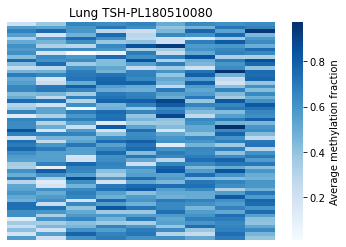

In [53]:
ax = plt.axes()
sb.heatmap(data,ax=ax,  xticklabels=False, yticklabels=False, cmap="Blues", cbar_kws={'label': 'Average methylation fraction'})
ax.set_title(outcome + " " + meth.name)
plt.show()

